In [1672]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import chardet 
from itertools import combinations
from scipy.stats import ttest_ind

In [1673]:
def get_unique_and_value_counts(df):
    '''Function that shows unique values in a column and counts them'''
    for col in list(df.columns):
        print(col)
        print(df[col].unique())
        print(df[col].value_counts(dropna=False))
        print()

In [1674]:
def replacement_mode(df,columns):
    '''Function of replacing gaps in the DataFrame column with mode'''
    for col in columns:
        df[col] = df[col].fillna(df[col].mode()[0])

In [1675]:
def replacement_median(df,columns):
    '''Function of replacing gaps in the DataFrame column with median'''
    for col in columns:
        df[col] = df[col].fillna(df[col].median())

In [1676]:
def replacement_prop(df,columns):
    '''Function of replacing gaps in the DataFrame column with values, according 
    to their percentage distribution in the column'''
    for col in columns:
        t = pd.DataFrame(df[col].value_counts(normalize=True))
        s_NaN = df[col].isna().sum()
        n = round(t[col]*s_NaN,0).to_dict()
        n = dict((k, v) for k, v in n.items() if v) # removed items with a value = 0
        index_NaN = np.where(df[col].isna())[0].tolist()
        if len(index_NaN)-sum(v for v in n.values() if v > 0)!=0:
            md = df[col].mode()[0]
            n[md]+=1
        for k, v in n.items():
            for index, element in enumerate(index_NaN):
                if index < v:
                    df.loc[element,col] = k
                    i = index
                else:
                    break
            del index_NaN[0:(i+1)]

In [1677]:
def label_encoding(data, col):
    '''Function of encoding categorical features'''
    unique_values = data[col].unique()
    enconding_values = range(len(unique_values))
    encoding_dict = dict(zip(unique_values, enconding_values))
    print(encoding_dict)
    return data[col].replace(encoding_dict)

In [1678]:
def get_boxplot(column):
    '''Function of plotting graphs showing the distribution density of values'''
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:10])], ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [1722]:
def get_stat_dif(column):
    '''Function that tests the null hypothesis that the distributions 
    of math scores for various parameters are indistinguishable'''
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [1679]:
pd.set_option('display.max_rows', 60) # show more strips
pd.set_option('display.max_columns', 60) # show more columns
stud = pd.read_csv('stud_math.csv')

In [1680]:
stud.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [1681]:
stud.shape

(395, 30)

In [1682]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [1683]:
stud.columns = ['school','sex','age','address','family_size',
                'p_status','mother_education','father_education','mother_job','father_job','school_choice',
                'guardian','travel_time','study_time','failures','school_support','family_support','paid_lessons',
               'activities','nursery','studytime_granular','higher_education','internet','romantic',
                'fam_relationship','free_time','go_out','health','absences','score']

In [1684]:
stud.isnull().sum() # Let's look at the number of data gaps

school                 0
sex                    0
age                    0
address               17
family_size           27
p_status              45
mother_education       3
father_education      24
mother_job            19
father_job            36
school_choice         17
guardian              31
travel_time           28
study_time             7
failures              22
school_support         9
family_support        39
paid_lessons          40
activities            14
nursery               16
studytime_granular     7
higher_education      20
internet              34
romantic              31
fam_relationship      27
free_time             11
go_out                 8
health                15
absences              12
score                  6
dtype: int64

In [1685]:
get_unique_and_value_counts(stud)

school
['GP' 'MS']
GP    349
MS     46
Name: school, dtype: int64

sex
['F' 'M']
F    208
M    187
Name: sex, dtype: int64

age
[18 17 15 16 19 22 20 21]
16    104
17     98
15     82
18     82
19     24
20      3
21      1
22      1
Name: age, dtype: int64

address
['U' nan 'R']
U      295
R       83
NaN     17
Name: address, dtype: int64

family_size
[nan 'GT3' 'LE3']
GT3    261
LE3    107
NaN     27
Name: family_size, dtype: int64

p_status
['A' nan 'T']
T      314
NaN     45
A       36
Name: p_status, dtype: int64

mother_education
[ 4.  1.  3.  2. nan  0.]
4.0    131
2.0    102
3.0     97
1.0     59
NaN      3
0.0      3
Name: mother_education, dtype: int64

father_education
[ 4.  1.  2.  3. 40. nan  0.]
2.0     106
3.0      96
4.0      88
1.0      78
NaN      24
0.0       2
40.0      1
Name: father_education, dtype: int64

mother_job
['at_home' 'health' 'other' 'services' 'teacher' nan]
other       133
services     98
at_home      58
teacher      55
health       32
NaN          1

### Now let's take a look at 30 columns and transform them if needed:

- age

<AxesSubplot:title={'center':'The age of students'}>

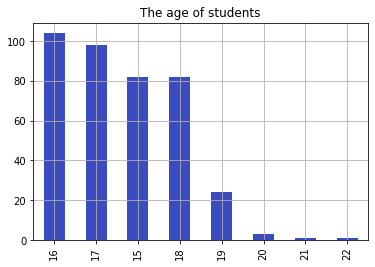

In [1686]:
stud['age'].value_counts().plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'coolwarm', 
                              title = 'The age of students')

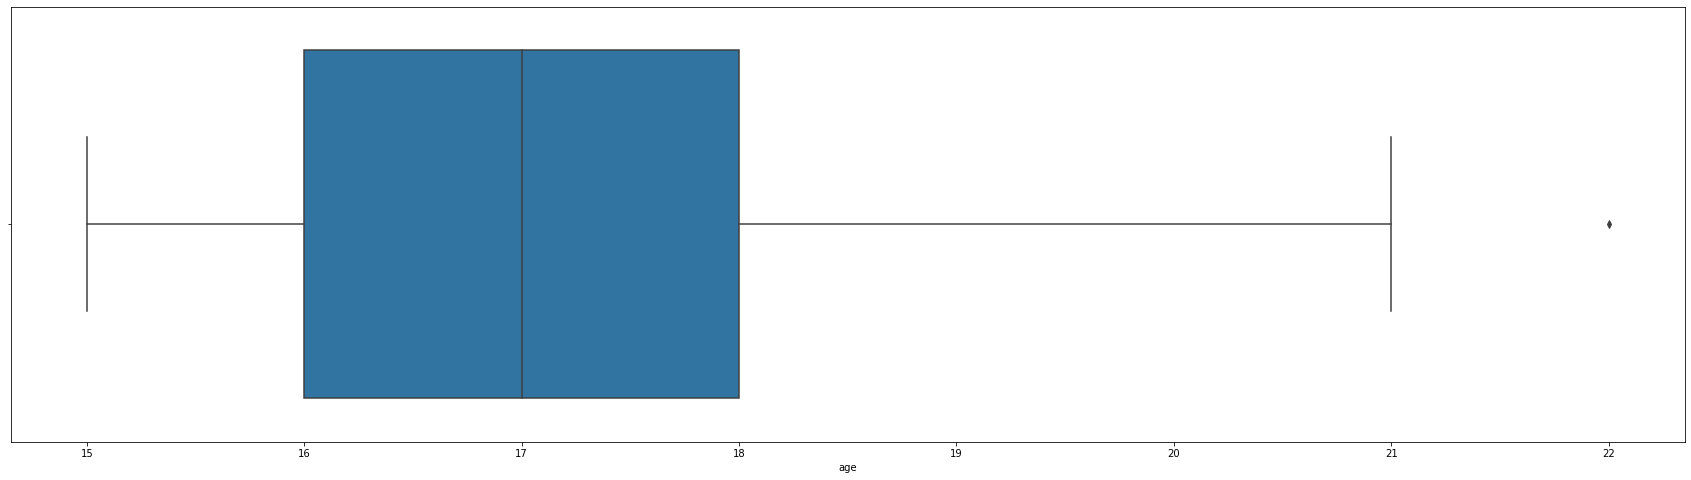

In [1687]:
fig = plt.figure(figsize=(30, 8)) # checking data for outliers
sns.boxplot(data=stud, x='age');

In [1688]:
stud.age.agg([np.mean, np.max, np.min, np.std]) # one outlier: age = 22

mean    16.696203
amax    22.000000
amin    15.000000
std      1.276043
Name: age, dtype: float64

- family_size

In [1689]:
# fill in the gaps by mode assuming a connection between family_size and p_status
stud.family_size = pd.Series(np.where((stud.p_status == 'T')&(stud.family_size.isnull()),'GT3',stud.family_size))
stud.family_size = pd.Series(np.where((stud.p_status == 'A')&(stud.family_size.isnull()),'LE3',stud.family_size))
stud.family_size = stud.family_size.fillna(stud.family_size.mode()[0]) # fill the rest with mode

- p_status

In [1690]:
# fill in the gaps by mode assuming a connection between family_size and p_status
stud.p_status = pd.Series(np.where((stud.family_size == 'GT3')&(stud.p_status.isnull()),'T',stud.p_status))
stud.p_status = pd.Series(np.where((stud.family_size == 'LE3')&(stud.p_status.isnull()),'A',stud.p_status))
stud.p_status = stud.p_status.fillna(stud.p_status.mode()[0]) # fill the rest with mode

#### Elimination of gaps in columns: address, mother_education, mother_job, father_job, school_choice, fam_relationship, free_time, go_out, health, father_education

In [1691]:
list_col = ['address', 'mother_education','mother_job', 'father_job', 'school_choice', 'fam_relationship',
           'free_time', 'go_out', 'health', 'father_education']
replacement_mode(stud,list_col)

- father_education

In [1692]:
stud.father_education = pd.Series(np.where((stud.father_education == 40.0
                                           ),stud.father_education.mode(),stud.father_education))
# father_education = 40.0 change to mode

- mother_job

Text(0.5, 1.0, 'Mothers jobs')

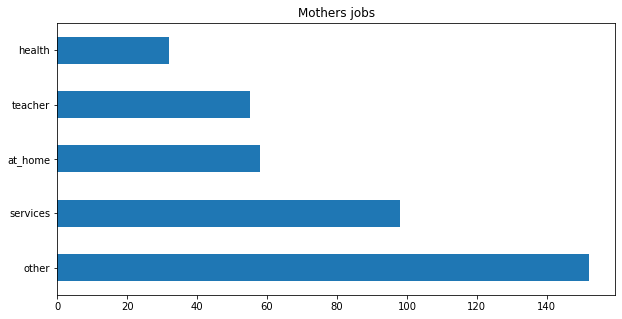

In [1693]:
plt.figure(figsize=(10, 5))
stud['mother_job'].value_counts().plot(kind='barh');
plt.title('Mothers jobs')

- father_job

<AxesSubplot:title={'center':'Fathers job'}>

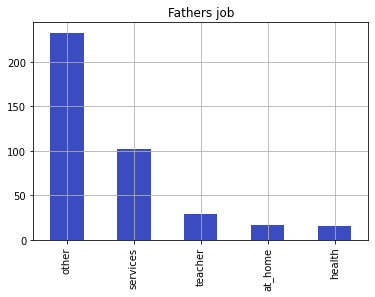

In [1694]:
stud.father_job.value_counts().plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'coolwarm', 
                              title = 'Fathers job' )

- fam_relationship

In [1695]:
stud.fam_relationship = pd.Series(np.where((stud.fam_relationship == -1.0
                                           ),stud.fam_relationship.mode(),stud.fam_relationship))
# fam_relationship = -1.0 change to mode

#### Elimination of gaps in columns: guardian, failures, school_support, family_support, paid_lessons, activities, nursery, higher_education, internet, romantic

In [1697]:
list_1 = ['guardian', 'failures','school_support', 'family_support', 'paid_lessons', 'activities', 'nursery', 
          'higher_education', 'internet', 'romantic']
replacement_prop(stud,list_1)

- failures

<AxesSubplot:title={'center':'failures'}>

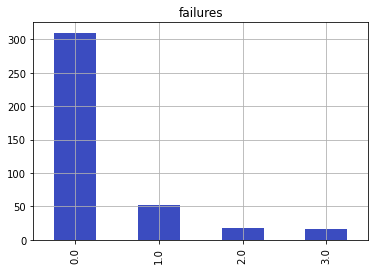

In [1698]:
stud.failures.value_counts().plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'coolwarm', 
                              title = 'failures' )

#### Elimination of gaps in columns: travel_time, study_time, score, absences, studytime_granular

In [1699]:
list_2 = ['travel_time', 'study_time','score', 'absences', 'studytime_granular']
replacement_median(stud,list_2)

In [1700]:
stud.isnull().sum()

school                0
sex                   0
age                   0
address               0
family_size           0
p_status              0
mother_education      0
father_education      0
mother_job            0
father_job            0
school_choice         0
guardian              0
travel_time           0
study_time            0
failures              0
school_support        0
family_support        0
paid_lessons          0
activities            0
nursery               0
studytime_granular    0
higher_education      0
internet              0
romantic              0
fam_relationship      0
free_time             0
go_out                0
health                0
absences              0
score                 0
dtype: int64

- travel_time

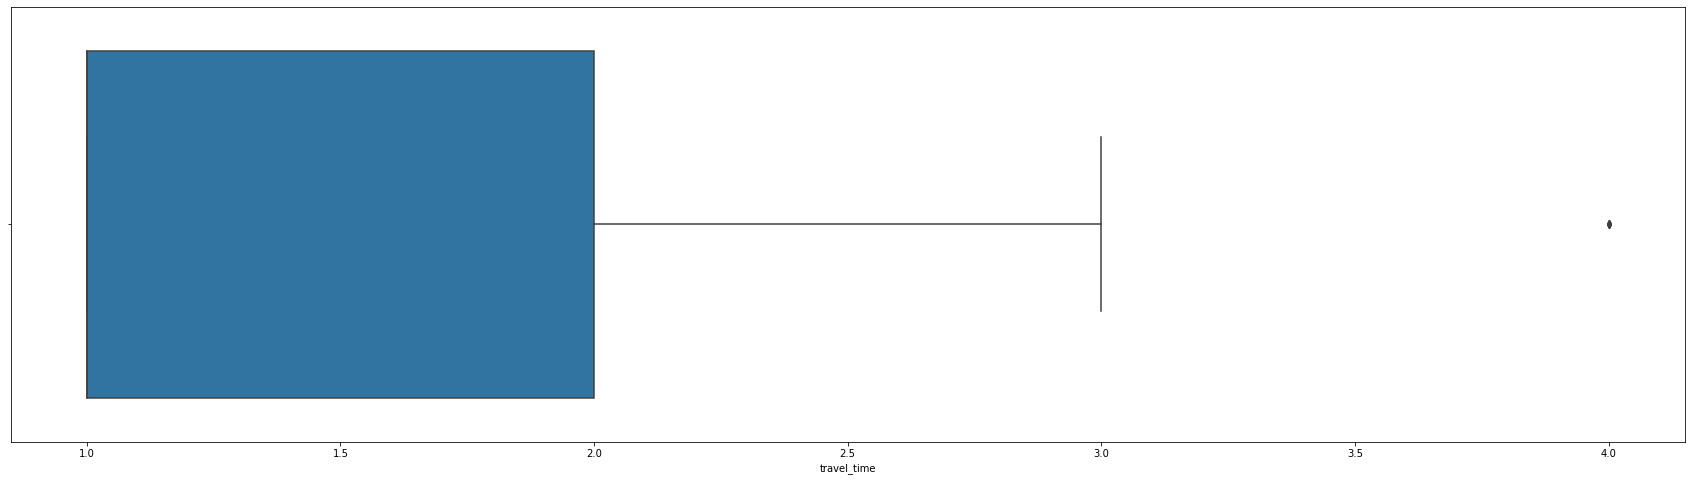

In [1701]:
fig = plt.figure(figsize=(30, 8)) # checking data for outliers
sns.boxplot(data=stud, x='travel_time');

In [1702]:
stud.travel_time.agg([np.mean, np.max, np.min, np.std, np.median]) 
# outliers with 7 values of travel_time = 4 (>60 min) - not discard these values

mean      1.407595
amax      4.000000
amin      1.000000
std       0.678490
median    1.000000
Name: travel_time, dtype: float64

- study_time

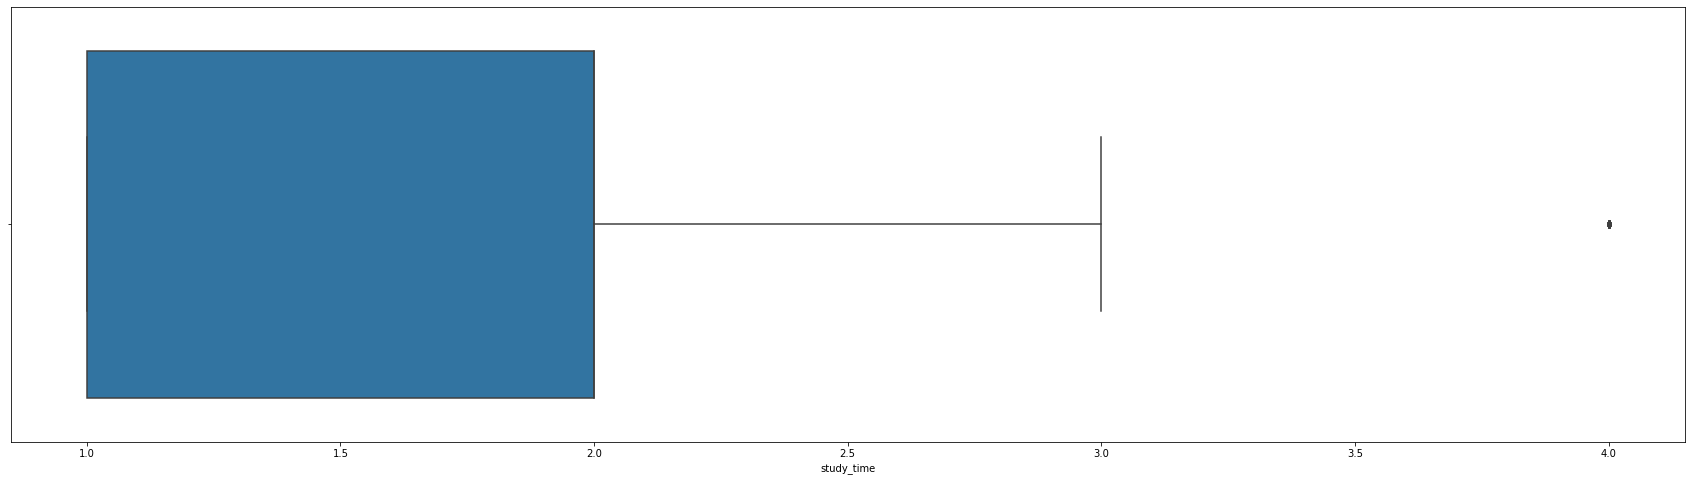

In [1703]:
fig = plt.figure(figsize=(30, 8)) # checking data for outliers
sns.boxplot(data=stud, x='study_time');

In [1704]:
stud.study_time.agg([np.mean, np.max, np.min, np.std, np.median]) 
# outliers with 27 values of travel_time = 4 (>10 h) - not discard these values

mean      2.037975
amax      4.000000
amin      1.000000
std       0.834580
median    2.000000
Name: study_time, dtype: float64

- absences 

In [1705]:
stud.absences.describe()

count    395.000000
mean       7.179747
std       23.111967
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

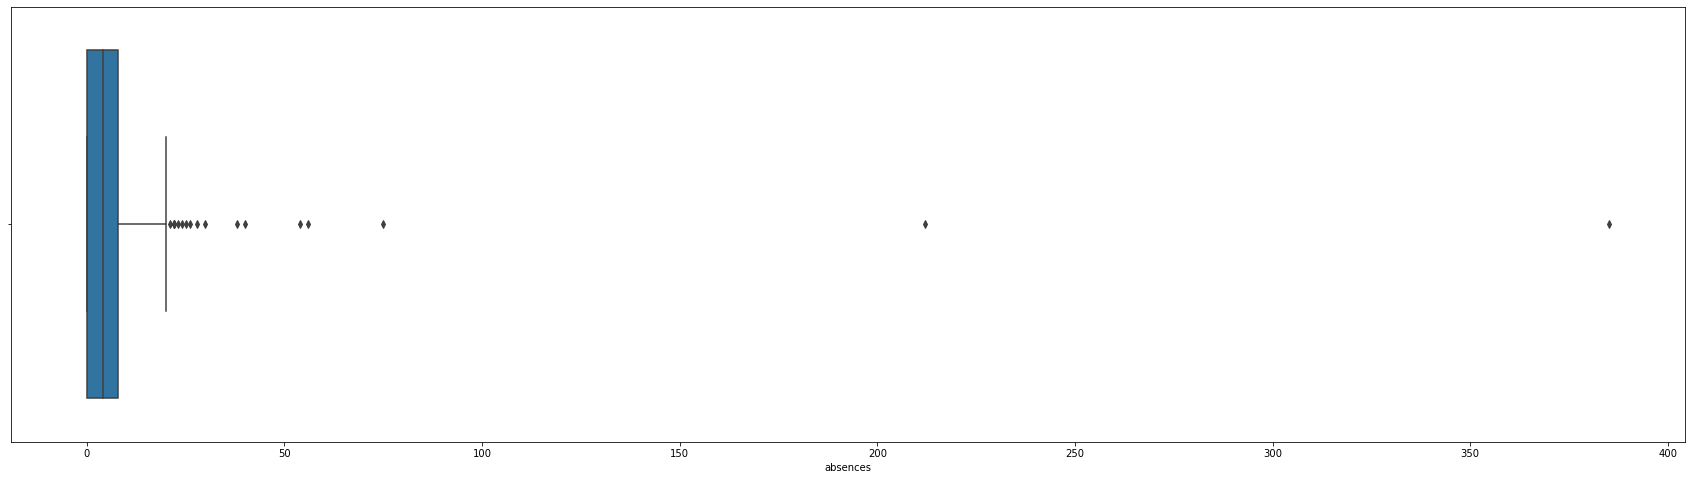

In [1706]:
fig = plt.figure(figsize=(30, 8)) # checking data for outliers
sns.boxplot(data=stud, x='absences');

In [1707]:
new_stud = stud.copy()
new_stud[new_stud['absences'] > 100] # absence from more than 100 lessons seems suspicious

,school,sex,age,address,family_size,p_status,mother_education,father_education,mother_job,father_job,school_choice,guardian,travel_time,study_time,failures,school_support,family_support,paid_lessons,activities,nursery,studytime_granular,higher_education,internet,romantic,fam_relationship,free_time,go_out,health,absences,score
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,other,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0


In [1708]:
new_stud = new_stud[new_stud['absences'] < 100]

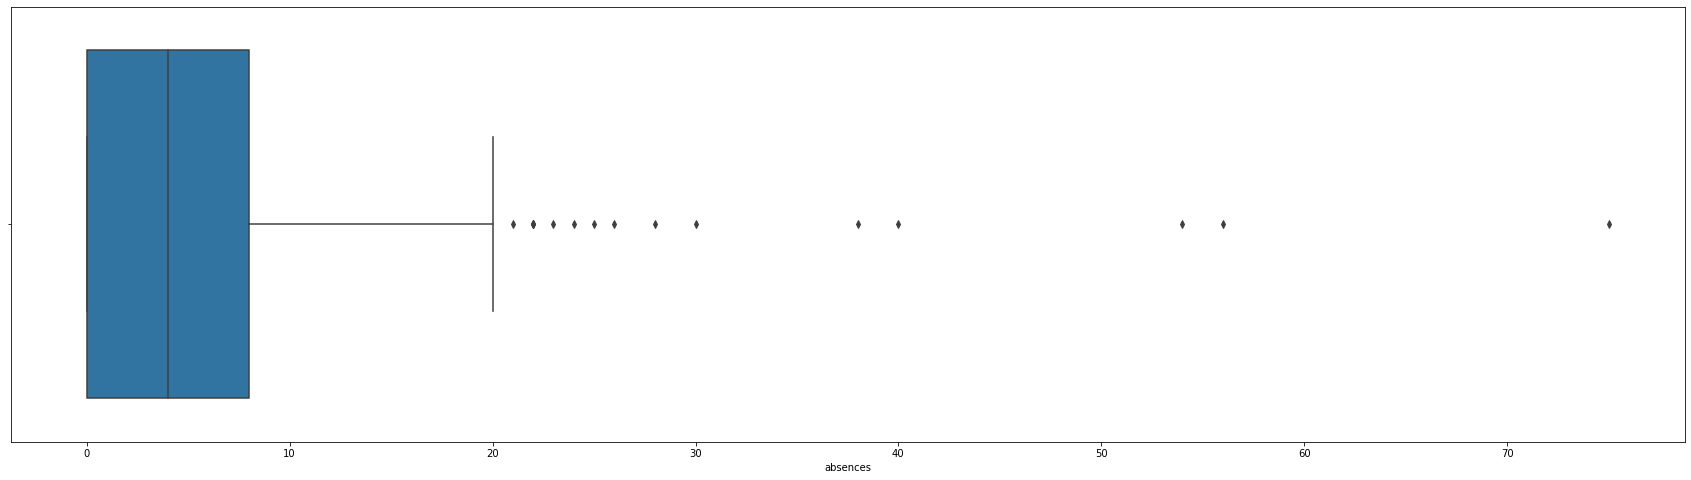

In [1709]:
fig = plt.figure(figsize=(30, 8)) # checking data for outliers
sns.boxplot(data=new_stud, x='absences');

In [1710]:
stud = new_stud.copy()

- score

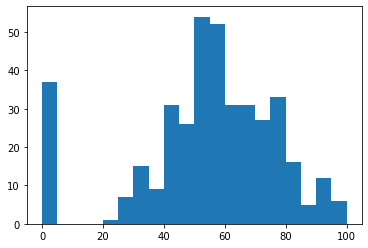

In [1711]:
plt.hist(stud['score'], bins=20);

In [1712]:
stud.score.describe()

count    393.000000
mean      52.239186
std       22.741309
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

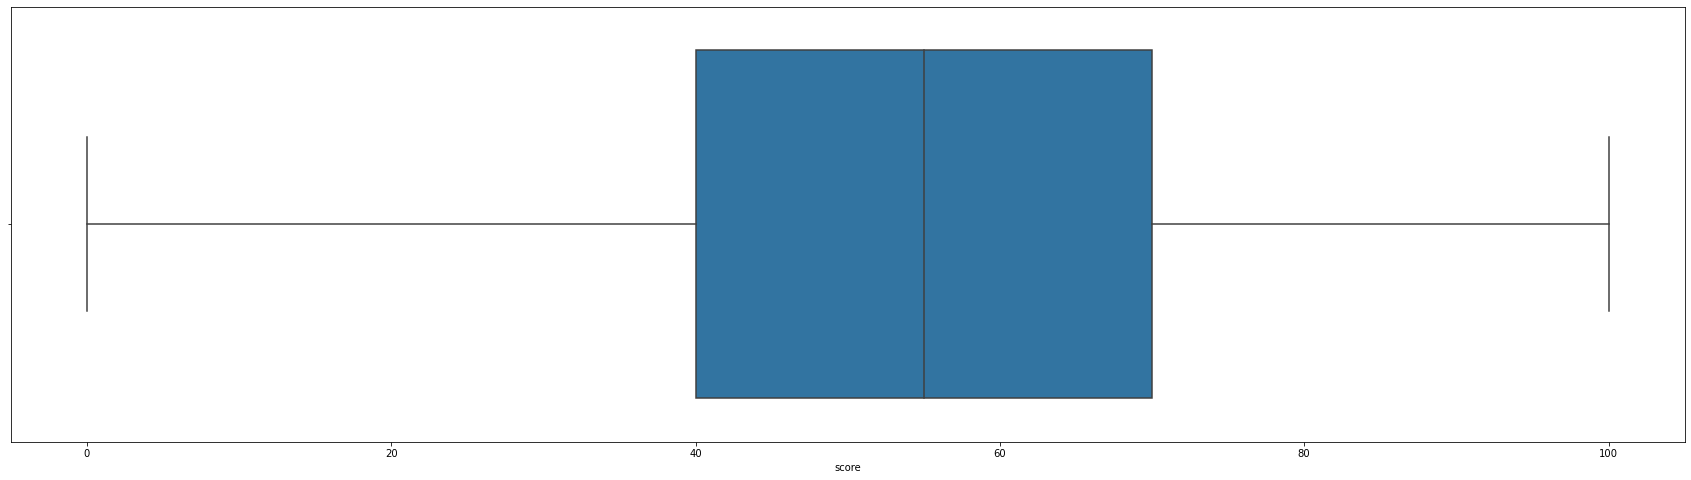

In [1713]:
fig = plt.figure(figsize=(30, 8)) # checking data for outliers: no outliers
sns.boxplot(data=stud, x='score');

#### studytime_granular

In [1714]:
stud.studytime_granular.describe()

count    393.000000
mean      -6.114504
std        2.510106
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime_granular, dtype: float64

<AxesSubplot:>

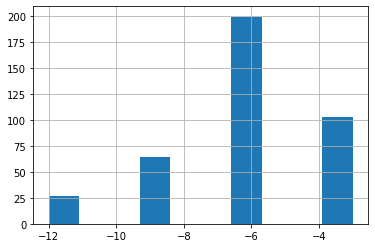

In [1715]:
stud.studytime_granular.hist()

### Correlation analysis

In [1716]:
stud.corr()

,age,mother_education,father_education,travel_time,study_time,failures,studytime_granular,fam_relationship,free_time,go_out,health,absences,score
age,1.000000,-0.158786,-0.146508,0.088761,-0.015255,0.233227,0.015255,0.051146,0.014402,0.127950,-0.063616,0.163111,-0.148801
mother_education,-0.158786,1.000000,0.592957,-0.166756,0.073536,-0.227342,-0.073536,-0.021757,0.032163,0.060892,-0.066730,0.094752,0.199556
father_education,-0.146508,0.592957,1.000000,-0.132293,0.002257,-0.244447,-0.002257,-0.030427,-0.021689,0.047549,-0.010446,0.034732,0.119549
travel_time,0.088761,-0.166756,-0.132293,1.000000,-0.094864,0.045161,0.094864,-0.026512,-0.010127,0.050421,-0.044573,0.000354,-0.053730
study_time,-0.015255,0.073536,0.002257,-0.094864,1.000000,-0.156357,-1.000000,0.027290,-0.119337,-0.051498,-0.064897,-0.065978,0.114818
failures,0.233227,-0.227342,-0.244447,0.045161,-0.156357,1.000000,0.156357,0.002857,0.065968,0.093347,0.067302,0.088887,-0.318436
studytime_granular,0.015255,-0.073536,-0.002257,0.094864,-1.000000,0.156357,1.000000,-0.027290,0.119337,0.051498,0.064897,0.065978,-0.114818
fam_relationship,0.051146,-0.021757,-0.030427,-0.026512,0.027290,0.002857,-0.027290,1.000000,0.151734,0.053712,0.098011,-0.033393,0.059473
free_time,0.014402,0.032163,-0.021689,-0.010127,-0.119337,0.065968,0.119337,0.151734,1.000000,0.290287,0.062987,-0.071490,0.020646
go_out,0.127950,0.060892,0.047549,0.050421,-0.051498,0.093347,0.051498,0.053712,0.290287,1.000000,-0.016017,0.032760,-0.119067


<AxesSubplot:>

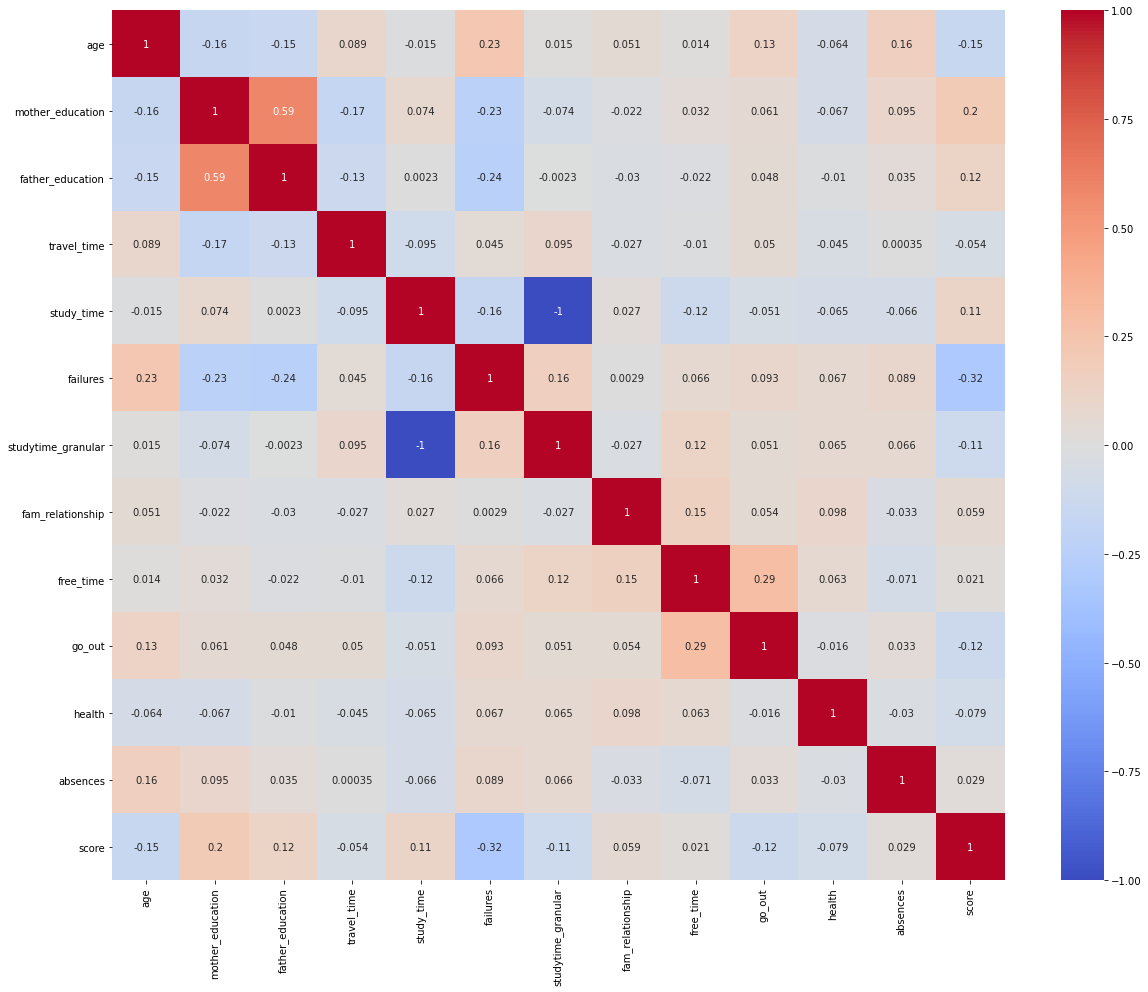

In [1723]:
plt.figure(figsize=(20, 16))
sns.heatmap(stud.corr(),annot=True,fmt='.2g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

### Analysis of nominative values

In [1738]:
for col in ['school', 'sex', 'address', 'family_size', 'p_status', 'mother_job', 'father_job', 'school_choice', 
            'guardian','school_support','family_support', 
            'paid_lessons', 'activities', 'nursery', 'higher_education', 'internet','romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mother_job
Найдены статистически значимые различия для колонки higher_education
Найдены статистически значимые различия для колонки romantic


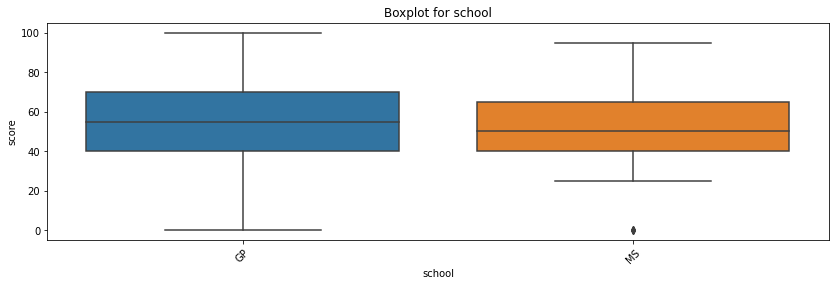

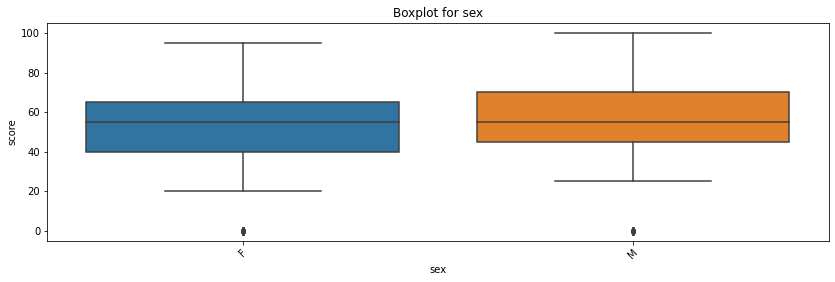

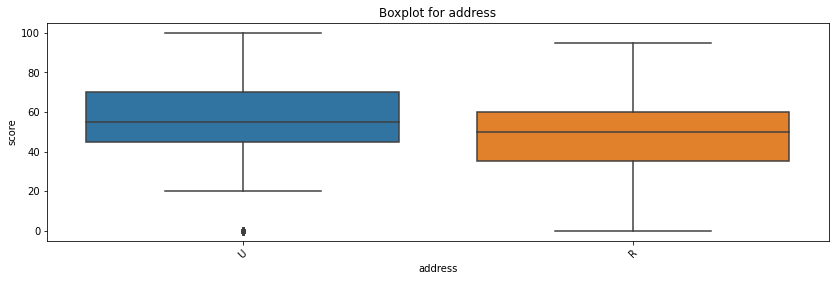

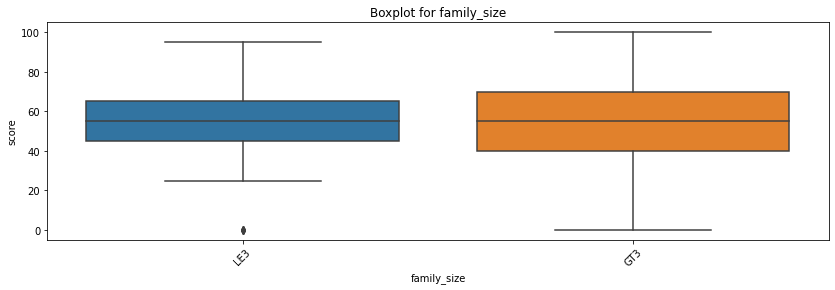

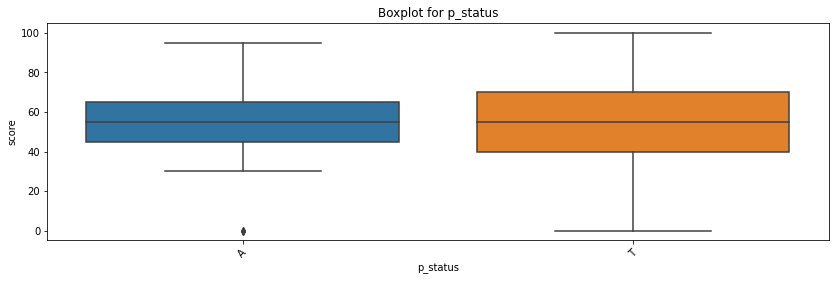

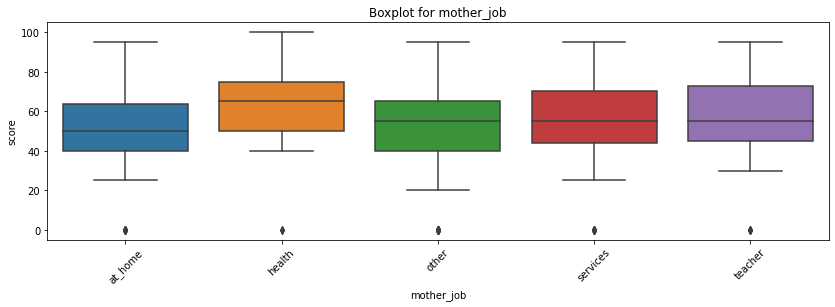

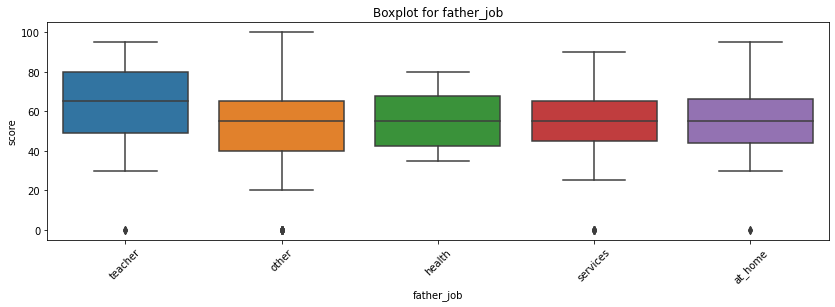

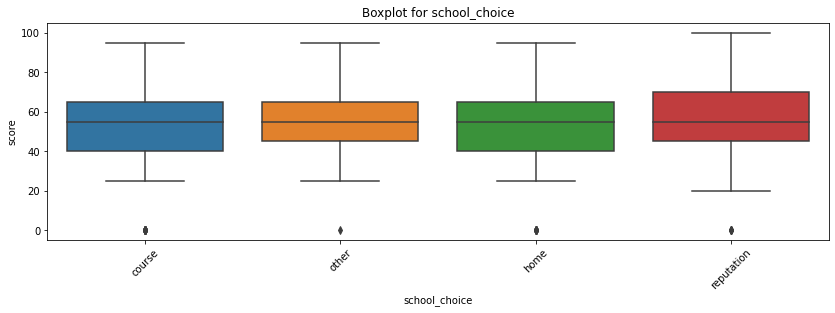

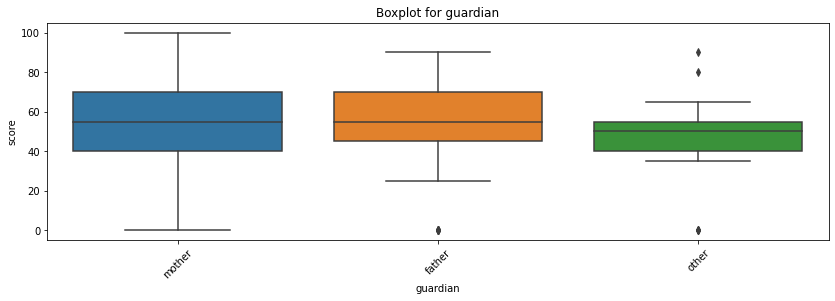

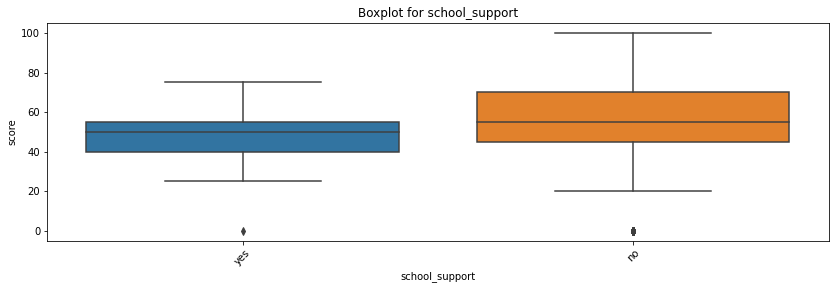

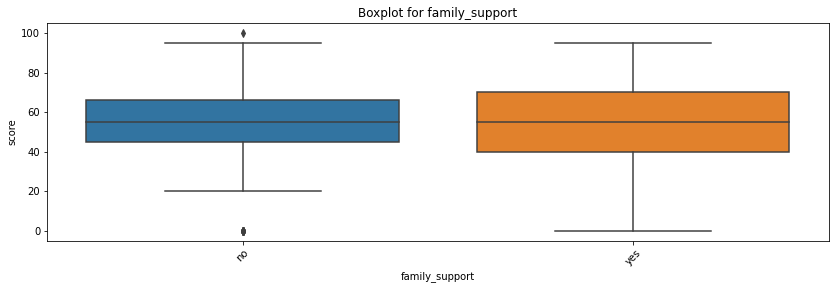

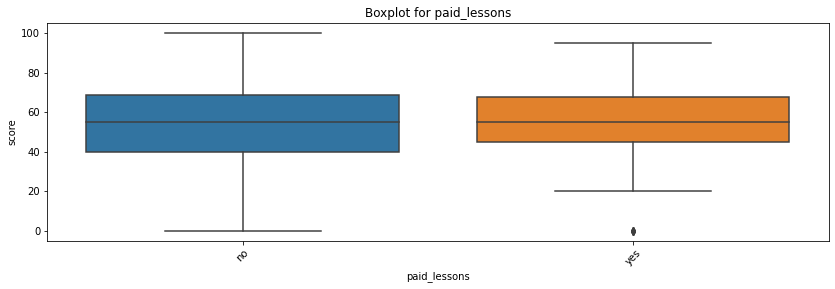

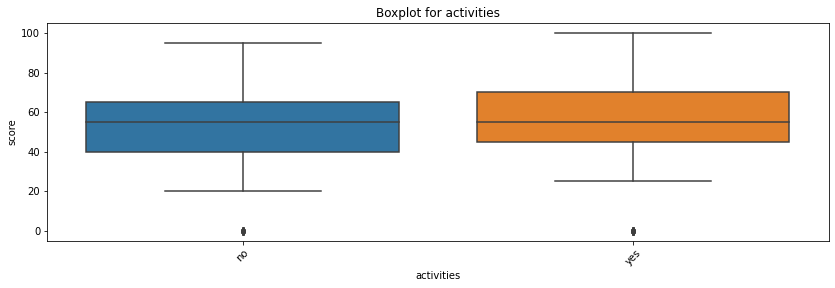

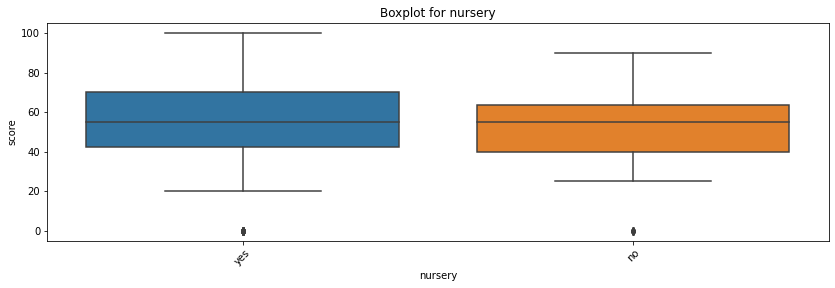

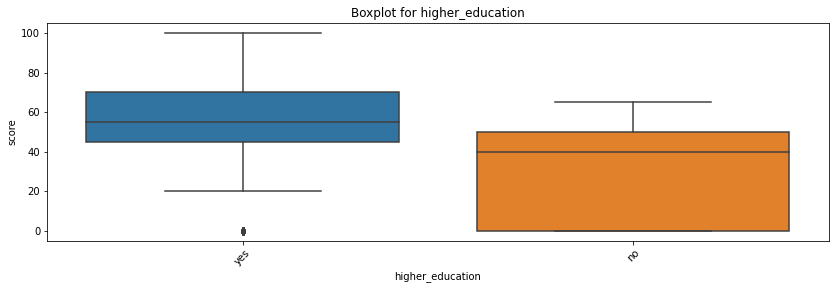

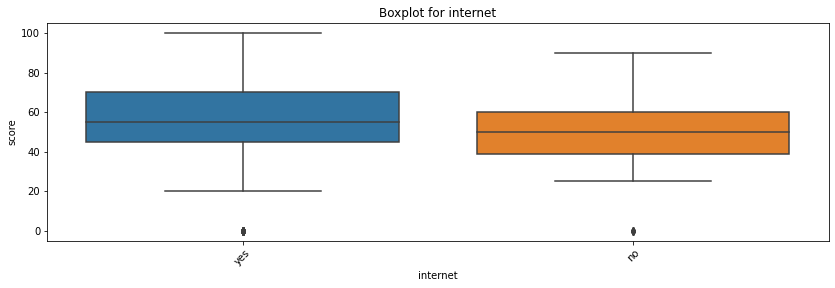

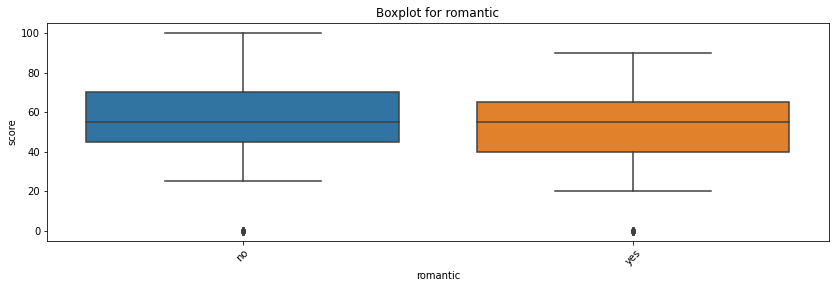

In [1718]:
for col in ['school', 'sex', 'address', 'family_size', 'p_status', 'mother_job', 'father_job', 'school_choice', 
            'guardian','school_support','family_support', 
            'paid_lessons', 'activities', 'nursery', 'higher_education', 'internet','romantic']:
    get_boxplot(col)

In [1740]:
stud_for_model = stud.loc[:, ['sex', 'address', 'mother_job', 'higher_education', 'romantic', 
                              'mother_education', 'failures', 'score']]
stud_for_model.head()

,sex,address,mother_job,higher_education,romantic,mother_education,failures,score
0,F,U,at_home,yes,no,4.0,0.0,30.0
1,F,U,at_home,yes,no,1.0,0.0,30.0
2,F,U,at_home,yes,no,1.0,3.0,50.0
3,F,U,health,yes,yes,4.0,0.0,75.0
4,F,U,other,yes,no,3.0,0.0,50.0


Итак, в результате EDA для анализа влияния условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике были получены следующие выводы:

- В данных достаточно мало пустых значений.
- Значимые выбросы найдены только в столбце с количеством пропущенных занятий (absences), что позволяет сделать вывод о том, что данные достаточно чистые.
- Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это sex, address, mother_job, higher_education, romantic, mother_education, failures, score